## 1. 初始準備

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


## 2. 讀入MNIST數據庫

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


## 3. 輸入格式整理

In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


#標準化處理
x_train_1 = (x_train - x_train.min()) / (x_train.max()-x_train.min())
x_test_1 = (x_test - x_test.min()) / (x_test.max()-x_test.min())

## 4. 輸出格式整理

In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## **Model**1

增加每層神經元個數
* 使用 <span style="color:red;">2</span> 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">500</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">500</span> 個神經元
* Activation Function 唯一指名 <span style="color:red;">sigmoid</span>

### Model1-1 打造神經網路

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [6]:
model_1 = Sequential()
model_1.add(Dense(500, input_dim = 784))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(500))
model_1.add(Activation('sigmoid'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.compile(loss='mse', optimizer=SGD(lr=0.087),  metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


### Model1-2 訓練神經網路

In [8]:
model_1_20 = model_1.fit(x_train_1, y_train, batch_size=100, epochs=20,
                       verbose=1,
                       validation_data=(x_test_1,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0900 - acc: 0.1447 - val_loss: 0.0896 - val_acc: 0.1910
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0894 - acc: 0.1956 - val_loss: 0.0892 - val_acc: 0.1731
Epoch 3/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0890 - acc: 0.2271 - val_loss: 0.0888 - val_acc: 0.3011
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0886 - acc: 0.2393 - val_loss: 0.0883 - val_acc: 0.2734
Epoch 5/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.0881 - acc: 0.2505 - val_loss: 0.0878 - val_acc: 0.2275
Epoch 6/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0875 - acc: 0.2461 - val_loss: 0.0871 - val_acc: 0.2371
Epoch 7/20
60000/60000 [==============================] - 9s 155us/step -

### Model1-3 檢驗結果

Text(0.5, 0, 'epoch')

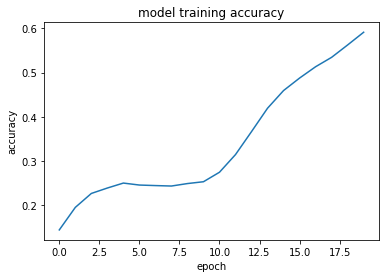

In [9]:
plt.plot(model_1_20.history['acc'])


plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')



In [10]:
score = model_1.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 1s 85us/step
loss: 0.05675552227497101
正確率 0.5907


## Model2

model1雖增加每層神經元個數，但正確率最終還是只有59%。
model2試著增加hidden layers
* 使用 <span style="color:red;">3</span> 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">500</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">500</span> 個神經元
* Hidden layer 3 用 <span style="color:red;">500</span> 個神經元
* Activation Function 唯一指名 <span style="color:red;">sigmoid</span>

### Model2-1 打造神經網路

In [11]:
model_2 = Sequential()
model_2.add(Dense(500, input_dim = 784))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(500))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(500))
model_2.add(Activation('sigmoid'))
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.compile(loss='mse', optimizer=SGD(lr=0.087),  metrics=['accuracy'])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_4 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_5 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
__________

### Model2-2 訓練神經網路

In [12]:
model_2_20 = model_2.fit(x_train_1, y_train, batch_size=100, epochs=20,
                       verbose=1,
                       validation_data=(x_test_1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0904 - acc: 0.1099 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0900 - acc: 0.1150 - val_loss: 0.0899 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0899 - acc: 0.1131 - val_loss: 0.0899 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0899 - acc: 0.1175 - val_loss: 0.0899 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 14s 234us/step - loss: 0.0899 - acc: 0.1172 - val_loss: 0.0899 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.0899 - acc: 0.1190 - val_loss: 0.0898 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 13s 217us/step - loss: 0.0898 - acc: 0.1190 - val_loss: 0.

### Model2-3 檢驗結果

10000/10000 [==============================] - 1s 120us/step
loss: 0.08732724857330322
正確率 0.3787


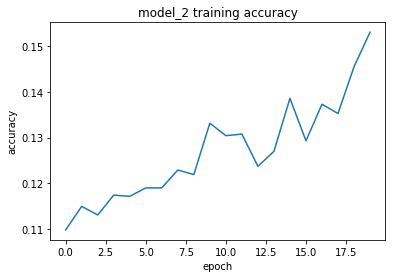

In [13]:
plt.plot(model_2_20.history['acc'])


plt.title('model_2 training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

score = model_2.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

## Model3 

model2試著增加hidden layers，反倒讓結果更差，於是再回到Model1只增加神經元個數，而不增加層數
並試著再提高神經元個數
* 使用 <span style="color:red;">2</span> 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">800</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">800</span> 個神經元
* Activation Function 唯一指名 <span style="color:red;">sigmoid</span>

### Model3-1 打造神經網路

In [14]:
model_3 = Sequential()
model_3.add(Dense(800, input_dim = 784))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(800))
model_3.add(Activation('sigmoid'))
model_3.add(Dense(10))
model_3.add(Activation('softmax'))

model_3.compile(loss='mse', optimizer=SGD(lr=0.087),  metrics=['accuracy'])
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 800)               628000    
_________________________________________________________________
activation_8 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 800)               640800    
_________________________________________________________________
activation_9 (Activation)    (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                8010      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


### Model3-2 訓練神經網路

In [15]:
model_3_20 = model_3.fit(x_train_1, y_train, batch_size=100, epochs=20,
                       verbose=1,
                       validation_data=(x_test_1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 19s 309us/step - loss: 0.0901 - acc: 0.1241 - val_loss: 0.0896 - val_acc: 0.1866
Epoch 2/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0894 - acc: 0.1500 - val_loss: 0.0892 - val_acc: 0.1268
Epoch 3/20
60000/60000 [==============================] - 18s 300us/step - loss: 0.0890 - acc: 0.1855 - val_loss: 0.0887 - val_acc: 0.2942
Epoch 4/20
60000/60000 [==============================] - 18s 297us/step - loss: 0.0885 - acc: 0.2455 - val_loss: 0.0882 - val_acc: 0.2213
Epoch 5/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0879 - acc: 0.2642 - val_loss: 0.0876 - val_acc: 0.2493
Epoch 6/20
60000/60000 [==============================] - 18s 302us/step - loss: 0.0873 - acc: 0.2836 - val_loss: 0.0868 - val_acc: 0.3005
Epoch 7/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.0865 - acc: 0.2955 - val_loss: 0.

### Model3-3 檢驗結果

10000/10000 [==============================] - 1s 150us/step
loss: 0.04763893393278122
正確率 0.6578


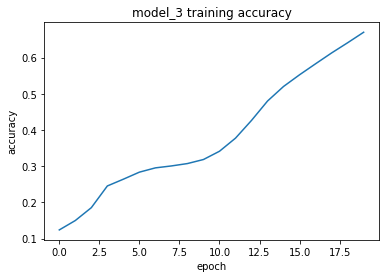

In [16]:
plt.plot(model_3_20.history['acc'])


plt.title('model_3 training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

score = model_3.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

## Model4

model3增加神經元個數後，並沒有大幅的上升（上升7%左右）
於是model4將試著改變學習次數，看是否能夠提高精準率
* 使用 <span style="color:red;">2</span> 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">800</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">800</span> 個神經元
* Activation Function 唯一指名 <span style="color:red;">sigmoid</span>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 800)               628000    
_________________________________________________________________
activation_11 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 800)               640800    
_________________________________________________________________
activation_12 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                8010      
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


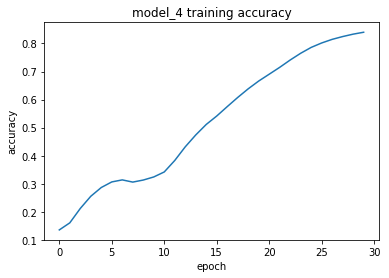

In [17]:
model_4 = Sequential()
model_4.add(Dense(800, input_dim = 784))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(800))
model_4.add(Activation('sigmoid'))
model_4.add(Dense(10))
model_4.add(Activation('softmax'))

model_4.compile(loss='mse', optimizer=SGD(lr=0.087),  metrics=['accuracy'])
model_4.summary()


model_4_30 = model_4.fit(x_train_1, y_train, batch_size=100, epochs=30,
                       verbose=1,
                       validation_data=(x_test_1,y_test))


plt.plot(model_4_30.history['acc'])


plt.title('model_4 training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

score = model_4.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

## Model5

model5將試著改變Activation Function，看是否能夠提高精準率
* 使用 <span style="color:red;">2</span> 個 hidden layers
* Hidden layer 1 用 <span style="color:red;">800</span> 個神經元
* Hidden layer 2 用 <span style="color:red;">800</span> 個神經元
* Activation Function 唯一指名 <span style="color:red;">relu</span>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 800)               628000    
_________________________________________________________________
activation_14 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 800)               640800    
_________________________________________________________________
activation_15 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                8010      
_________________________________________________________________
activation_16 (Activation)   (None, 10)                0         
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________


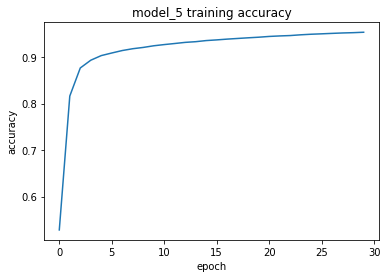

In [18]:
model_5 = Sequential()
model_5.add(Dense(800, input_dim = 784))
model_5.add(Activation('relu'))
model_5.add(Dense(800))
model_5.add(Activation('relu'))
model_5.add(Dense(10))
model_5.add(Activation('softmax'))

model_5.compile(loss='mse', optimizer=SGD(lr=0.087),  metrics=['accuracy'])
model_5.summary()


model_5_30 = model_5.fit(x_train_1, y_train, batch_size=100, epochs=30,
                       verbose=1,
                       validation_data=(x_test_1,y_test))


plt.plot(model_5_30.history['acc'])


plt.title('model_5 training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

score = model_5.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

## 比較兩種Activation Function

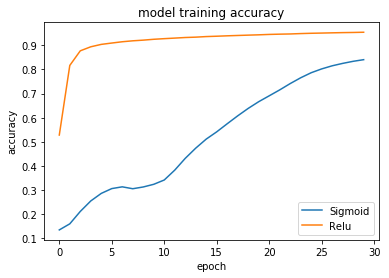

In [21]:
plt.plot(model_4_30.history['acc'])
plt.plot(model_5_30.history['acc'])


plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Sigmoid", "Relu"], loc = "best")

發現Relu的學習效果從前面就比sigmoid好太多拉～！！！！

並且Relu在大約epoch五次以後，就漸漸趨近平緩

## 結論

* 神經元個數越多越好
* 層數增加效果不一定好
* 在sigmoid學習次數增加會有更好的結果，但再Relu學習次數增加大約五次以後就趨近平緩
* 慎選Activation Function

## 存擋拉～！

In [0]:
model_json = model_5.to_json()
open('model.json', 'w').write(model_json)
model_5.save_weights('model_weights.h5')